In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Import the necessary functions
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [24]:
dff = pd.read_csv('credit_messy.csv')
df = dff.drop(columns=['ID', 'Default'], axis=1)

In [25]:
dff.head()

,ID,CreditLimit,Gender,Education,MaritalStatus,Age,RepayStatApr,RepayStatMay,RepayStatJun,RepayStatJul,...,BillJun,BillMay,BillApr,PaymentSep,PaymentAug,PaymentJul,PaymentJun,PaymentMay,PaymentApr,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
# from sklearn.decomposition import PCA
fit = PCA(random_state=123)
pca = fit.fit_transform(df)
pca

array([[-1.66488191e+05, -7.55381537e+04, -4.72952106e+02, ...,
        -8.09516582e-01, -3.99510519e-01,  6.15188166e-01],
       [-1.14226977e+05,  9.78067125e+03,  2.73444748e+03, ...,
        -1.48254510e-01,  4.46854592e-01,  9.41970995e-01],
       [-9.84323622e+04, -3.34713873e+04, -2.67846979e+03, ...,
        -1.03652697e-01,  5.53215892e-01, -1.46022711e-02],
       ...,
       [-1.40206128e+05, -7.78574965e+04,  2.62431334e+04, ...,
         7.45187745e-01,  1.02976382e-01, -7.67930676e-01],
       [-4.14277408e+04, -7.49083037e+04,  1.77225880e+04, ...,
         3.15210611e-01, -6.77756607e-01, -3.85726053e-01],
       [-7.08603112e+04, -9.55141443e+04, -1.41174666e+04, ...,
         2.40245181e-01, -5.85022009e-01,  1.95155451e-02]])

In [18]:
pca = pd.DataFrame(pca[:, :8], index=df.index)
pca

,0,1,2,3,4,5,6,7
0,-1.664882e+05,-75538.153664,-472.952106,-138.240595,356.372601,-22.858177,-861.737802,79.013084
1,-1.142270e+05,9780.671251,2734.447477,-1567.195890,-4050.710334,696.602606,-1516.058527,1261.720752
2,-9.843236e+04,-33471.387331,-2678.469790,-5102.262357,3361.177076,177.028488,-6986.944318,1612.055662
3,-7.123068e+04,-95224.273104,-10047.716972,4420.222964,-637.932441,6192.886363,2367.988856,837.225566
4,-1.148346e+05,-68729.185233,24604.948086,34257.290425,8197.837873,4668.730523,-11838.007527,2722.672426
5,-6.706351e+04,-97913.796573,-34488.745498,9142.944858,3925.006389,9432.206972,724.475633,1155.958171
6,1.027202e+06,-196044.471698,202092.615028,-13701.598880,-56646.590780,-32246.675410,14875.889829,-13525.837295
7,-1.248424e+05,-7202.870022,-5041.721453,-3111.865831,729.718136,1474.621532,-5537.367236,23.196356
8,-8.685778e+04,17128.342589,-1600.543641,-204.541402,-7482.660145,-1892.019467,2043.992393,2246.667809
9,-1.606628e+05,-78307.751943,16398.984332,-7466.230550,8040.135291,4873.841116,1516.313791,8078.762547


Text(0, 0.5, 'Variance Explained')

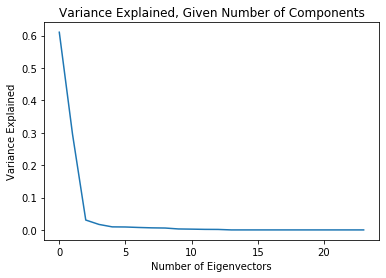

In [23]:
plt.plot(fit.explained_variance_ratio_)
plt.title("Variance Explained, Given Number of Components")
plt.xlabel("Number of Eigenvectors")
plt.ylabel("Variance Explained")

In [19]:
print(fit.explained_variance_ratio_)
print("--------------------")
print("If we use our 8 most __ we can explain",fit.explained_variance_ratio_[:8].sum()*100," % of our data!")

[6.10437013e-01 2.95353813e-01 3.05241925e-02 1.69285926e-02
 9.42041926e-03 9.04174545e-03 7.54445790e-03 6.38481379e-03
 5.83708771e-03 2.96671412e-03 2.38506002e-03 1.69774353e-03
 1.47834530e-03 1.83162337e-09 9.37745809e-11 1.94256625e-11
 1.24761563e-11 1.17818918e-11 7.83531981e-12 5.77630757e-12
 5.37275222e-12 4.64414890e-12 3.85781359e-12]
--------------------
If we use our 8 most __ we can explain 98.56350473233837  % of our data!


In [26]:
pca_5 = pd.DataFrame(pca.iloc[:,:8])
pca_5.rename(columns={0:'x1',1:'x2',2:'x3',3:'x4',4:'x5',5:'x6',6:'x7',7:'x8'}, inplace=True)
pca_df = pca_5.join(dff.Default, on=dff.index)
pca_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,Default
0,-166488.191085,-75538.153664,-472.952106,-138.240595,356.372601,-22.858177,-861.737802,79.013084,1
1,-114226.976816,9780.671251,2734.447477,-1567.195890,-4050.710334,696.602606,-1516.058527,1261.720752,1
2,-98432.362180,-33471.387331,-2678.469790,-5102.262357,3361.177076,177.028488,-6986.944318,1612.055662,0
3,-71230.675903,-95224.273104,-10047.716972,4420.222964,-637.932441,6192.886363,2367.988856,837.225566,0
4,-114834.618365,-68729.185233,24604.948086,34257.290425,8197.837873,4668.730523,-11838.007527,2722.672426,0


In [59]:
vects = fit.components_

In [60]:
one = pd.Series(vects[0], index=df.columns)
one.sort_values(ascending=False)

CreditLimit      4.915907e-01
BillSep          3.884535e-01
BillAug          3.813561e-01
BillJul          3.721794e-01
BillJun          3.463975e-01
BillMay          3.229200e-01
BillApr          3.085773e-01
PaymentAug       3.128653e-02
PaymentJul       2.681853e-02
PaymentSep       2.656761e-02
PaymentApr       2.480990e-02
PaymentMay       2.220441e-02
PaymentJun       2.216813e-02
Age              5.568800e-06
RepayStatSep     8.368717e-07
RepayStatAug     7.593733e-07
RepayStatJul     6.645841e-07
RepayStatJun     5.817799e-07
RepayStatMay     5.684583e-07
RepayStatApr     3.424552e-07
Gender          -3.528730e-08
Default         -1.754795e-07
MaritalStatus   -1.924693e-07
Education       -3.672906e-07
dtype: float64

In [61]:
two = pd.Series(vects[1], index=df.columns)
two.sort_values(ascending=False)

CreditLimit      8.690227e-01
PaymentApr       1.533413e-02
PaymentMay       1.169311e-02
PaymentJul       1.096856e-02
PaymentAug       1.078482e-02
PaymentJun       1.036449e-02
PaymentSep       5.716259e-03
Age              8.313323e-06
Gender           1.761003e-07
MaritalStatus   -4.015163e-07
Default         -5.062216e-07
Education       -1.499723e-06
RepayStatApr    -3.803404e-06
RepayStatSep    -3.984388e-06
RepayStatAug    -4.031775e-06
RepayStatJul    -4.259597e-06
RepayStatJun    -4.498198e-06
RepayStatMay    -4.622460e-06
BillApr         -1.673653e-01
BillMay         -1.767757e-01
BillJun         -1.940482e-01
BillJul         -2.165349e-01
BillSep         -2.213643e-01
BillAug         -2.263758e-01
dtype: float64

In [99]:
pca_df.sort_values(by='x1')['CreditLimit'][:5000].value_counts(),pca_df.sort_values(by='x1')['Age'][:5000].value_counts()

(20000     1918
 50000      880
 30000      684
 10000      493
 80000      403
 100000     170
 60000      154
 90000      122
 40000       83
 70000       78
 110000      11
 16000        1
 130000       1
 120000       1
 280000       1
 Name: CreditLimit, dtype: int64, 24    405
 23    385
 25    315
 22    314
 27    254
 26    225
 29    186
 28    185
 30    148
 31    139
 34    134
 36    132
 38    130
 37    122
 35    119
 44    111
 32    111
 43    107
 46    107
 45    102
 40    101
 42    100
 41     95
 39     94
 33     93
 47     87
 48     84
 49     82
 50     72
 53     69
 51     65
 52     58
 21     53
 56     39
 55     37
 54     33
 58     22
 57     20
 59     20
 61     13
 60     12
 62      9
 63      5
 64      3
 67      1
 65      1
 69      1
 Name: Age, dtype: int64)

In [89]:
pca_df.sort_values(by='x2')['CreditLimit'][:500].value_counts(),pca_df.sort_values(by='x2')['Age'][:500].value_counts()

(240000     37
 200000     36
 500000     23
 150000     20
 280000     20
 260000     19
 230000     18
 220000     17
 320000     17
 380000     16
 360000     16
 300000     16
 290000     16
 340000     15
 310000     15
 180000     14
 420000     12
 190000     11
 250000     10
 410000      9
 140000      9
 80000       8
 330000      8
 350000      8
 480000      8
 210000      7
 440000      7
 430000      7
 400000      6
 270000      6
 170000      5
 460000      5
 370000      5
 470000      4
 130000      4
 110000      4
 390000      4
 100000      3
 450000      3
 490000      3
 550000      3
 50000       3
 160000      3
 70000       2
 580000      2
 20000       2
 1000000     1
 120000      1
 60000       1
 570000      1
 590000      1
 530000      1
 680000      1
 600000      1
 610000      1
 510000      1
 40000       1
 520000      1
 620000      1
 327680      1
 Name: CreditLimit, dtype: int64, 35    27
 30    27
 39    26
 36    25
 28    25
 41    25
 29    

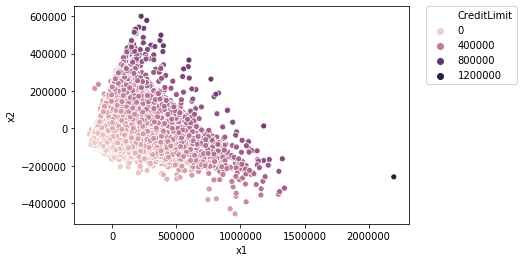

In [104]:
sns.scatterplot("CreditLimit", "x2", hue = "CreditLimit", data = pca_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)